#  Лабораторная работа №1  
#### Выполнил: Прокопенко А.С. РК6-61Б


Считаем данные в массив точек и отсортируем для построения графика

In [20]:
from numpy import genfromtxt

my_data = genfromtxt('lab1.csv', delimiter=' ')
my_data = my_data.tolist()
my_data.sort(key=lambda x: x[0])


Полученный набор точек переведем в два массива и построим по ним график

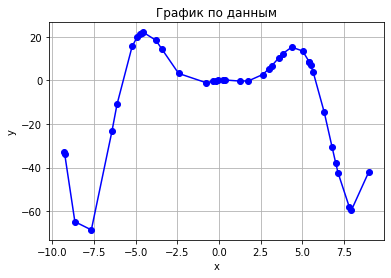

In [89]:
import matplotlib.pyplot as plt

all_x = [item[0] for item in my_data]
all_y = [item[1] for item in my_data]

fig, ax = plt.subplots()

ax.plot(all_x, all_y, 'bo-')

ax.set(xlabel='x', ylabel='y',
       title='График по данным')
ax.grid()

Зададим функцию, вычисляющую погрешность апроксимации:

In [90]:
from numpy import abs
def calc_error(y_opt, y_real):
    res1 = 0
    res2 = 0
    for i in range(len(y_real)):
        res2 += abs(y_real[i] - y_opt[i])
        res1 += (y_real[i] - y_opt[i]) ** 2
    return res1 / len(y_real), res2 / len(y_real)

По пробуем апроксимировать этот график с помощью функции:  
$$
f(x, a_{0}, a_{1}, a_{2}) = a_{2} * x^2 + a_{1} * x + a_{0} 
$$ (1)  

a0 = -0.7838257333163453, a1  = -0.5420073992099618, a2 = 15.512962419621536
Среднеквадратическая ошибка: 267.631805
Среднее абсолютное отклонение : 14.483058 



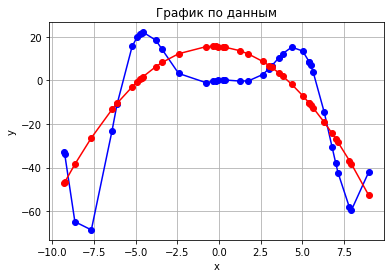

In [99]:
from scipy.optimize import curve_fit

f = lambda x, a0, a1, a2: a0 * x ** 2 + a1 * x + a2
opt = curve_fit(f, all_x, all_y)[0]
a0, a1, a2 = opt[0], opt[1], opt[2]

print('a0 = %s, a1  = %s, a2 = %s' % (a0, a1, a2))

fig, ax = plt.subplots()
opt_y = [f(x, a0, a1, a2) for x in all_x]
ax.plot(all_x, all_y, 'bo-')
ax.plot(all_x, opt_y, 'ro-')
ax.set(xlabel='x', ylabel='y',
       title='График по данным')
ax.grid()
print('Среднеквадратическая ошибка: %lf\nСреднее абсолютное отклонение : %lf \n' % (
    calc_error(opt_y, all_y)))

### Сравнение  
Заметно, что выбранная нами функция не очень хорошо апроксимирует наши значения.

Теперь возьем апроксимацию четными функциями функцию  
$$  
f(x, a_{0}, a_{1}) = a_{0}*x^2*sin(a_{1} * x)
$$ (2)  

a0 = -0.30155518301250145, a1  = 1.1121855644631484
Среднеквадратическая ошибка: 647.435379
Среднее абсолютное отклонение : 17.080216 



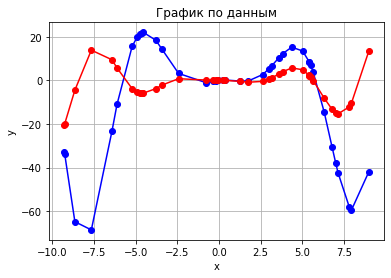

In [98]:
f = lambda x, a0, a1: a0 * x ** 2 * sin(a1 * x)
opt2 = curve_fit(f, all_x, all_y)[0]
a0, a1 = opt2[0], opt2[1]

fig, ax = plt.subplots()
opt_y = [f(x, a0, a1) for x in all_x]
ax.plot(all_x, all_y, 'bo-')
ax.plot(all_x, opt_y, 'ro-')
ax.set(xlabel='x', ylabel='y',
       title='График по данным')
ax.grid()
fig.savefig("graphic2.png")
print('a0 = %s, a1  = %s' % (a0, a1))
print('Среднеквадратическая ошибка: %lf\nСреднее абсолютное отклонение : %lf \n' % (
    calc_error(opt_y, all_y)))

Теперь возьмем апроксимацию четными функциями функцию  
$$  
f(x, a_{0}, a_{1}, a_{2}) = a_{0}+a_{1}*x*sin(x)+a_{2}*x^2*cos(x)  
$$ (3)  

a0 = 1.169846511902048, a1  = 4.491907395850161, a2 = 0.6227631071009212
Среднеквадратическая ошибка: 32.313379
 Среднее абсолютное отклонение : 4.674182 



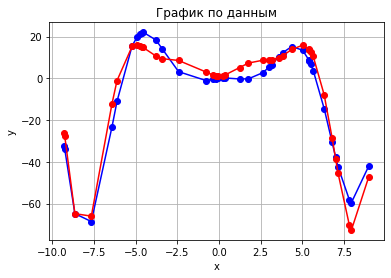

In [96]:
from numpy import sin, cos

f = lambda x, a0, a1, a2: a0 + a1 * x * sin(a2 * x) + a2 * x ** 2 * cos(a0 * x)
opt2 = curve_fit(f, all_x, all_y)[0]
a0, a1, a2 = opt2[0], opt2[1], opt2[2]

fig, ax = plt.subplots()
opt_y = [f(x, a0, a1, a2) for x in all_x]
ax.plot(all_x, all_y, 'bo-')
ax.plot(all_x, opt_y, 'ro-')
ax.set(xlabel='x', ylabel='y',
       title='График по данным')
ax.grid()
fig.savefig("graphic3.png")
print('a0 = %s, a1  = %s, a2 = %s' % (a0, a1, a2))
print('Среднеквадратическая ошибка: %lf\n Среднее абсолютное отклонение : %lf \n' % (
    calc_error(opt_y, all_y)))

## Вывод  
Таким образом, экспериментальным путём было выявлено, что наилучшей апроксимирующей функцией является функция вида $$ f(x, a_{0}, a_{1}, a_{2}) = a_{0}+a_{1}*x*sin(x)+a_{2}*x^2*cos(x)  $$ параметры которой были определены по методу `МНК` и равны следующим значениям:  
$$ 
a_{0} = 1.169846511902048 ;  a_{1} =  4.491907395850161 ; a_{2} = a2 = 0.6227631071009212
$$ 
Вычислены среднеквадратическая ошибка и среднее абсолютное отклонение, наименьшее значение которых для функции (3)  